In [306]:
import pandas as pd #for working with dataframes
import numpy as np #for linear algebra

In [307]:
from matplotlib import pyplot as plt #all for visualization
%matplotlib inline
import seaborn as sns

In [308]:
base_site = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'

In [309]:
table = pd.read_html(base_site) #reading html with pandas

In [310]:
type(table[0])

pandas.core.frame.DataFrame

In [311]:
len(table)

3

In [312]:
df = table[1]
df #original table

,Index,Height(Inches),Weight(Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30
...,...,...,...
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47


In [313]:
df.shape

(200, 3)

In [314]:
df = df.drop('Index', axis=1) #We don't need an extra index numbers

In [315]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Height(Inches)    200 non-null float64
Weight(Pounds)    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [316]:
df.describe()

,Height(Inches),Weight(Pounds)
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


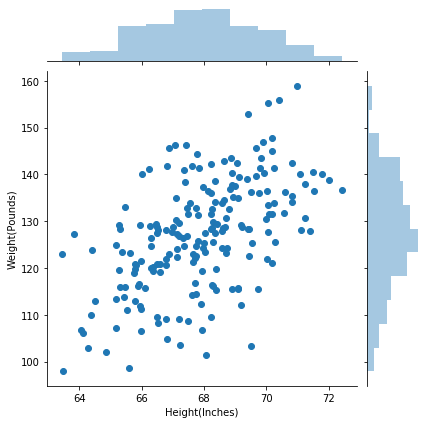

In [340]:
sns.jointplot(x='Height(Inches)', y='Weight(Pounds)', data=df)

In [341]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.542851
Weight(Pounds),0.542851,1.000000


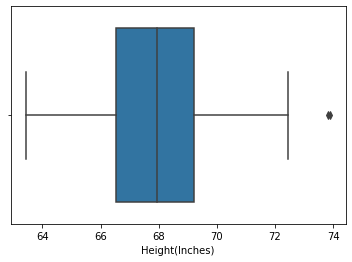

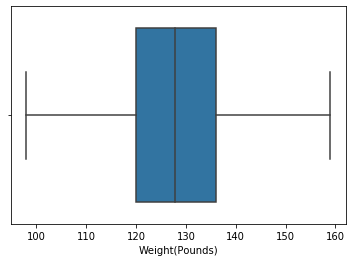

In [318]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

In [319]:
df[df['Height(Inches)'] > 73] 

,Height(Inches),Weight(Pounds)
138,73.90,151.39
174,73.83,139.30


In [320]:
df = df.drop(df.index[df['Height(Inches)'] > 73], axis=0) #let's drop those two outliers

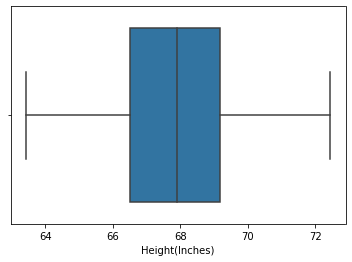

In [321]:
sns.boxplot(x='Height(Inches)', data=df)

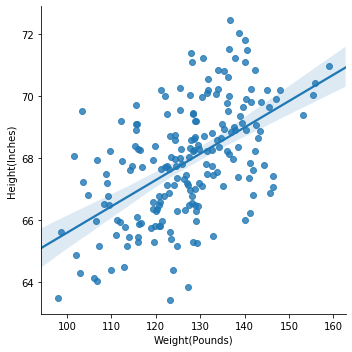

In [322]:
sns.lmplot(x='Weight(Pounds)', y='Height(Inches)', data=df) #what I see here is moderate deviations

In [323]:
X = df['Height(Inches)']

In [324]:
y = df['Weight(Pounds)']

In [325]:
X = df['Height(Inches)'].values.reshape(-1,1)
y = df['Weight(Pounds)'].values.reshape(-1,1)

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #splitting the data

In [328]:
from sklearn.linear_model import LinearRegression

In [329]:
lm = LinearRegression()

In [330]:
lm.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
print(lm.intercept_)

[-94.2657505]


In [332]:
lm.coef_ #y = -94.27 + 3.25x

array([[3.24955071]])

In [333]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

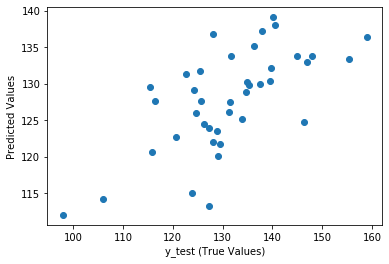

In [334]:
plt.scatter(y_test, prediction)
plt.xlabel('y_test (True Values)')
plt.ylabel('Predicted Values')

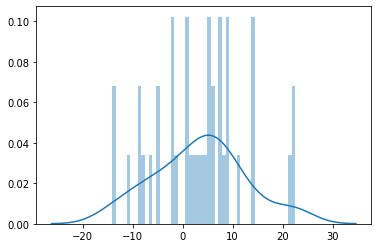

In [335]:
sns.distplot((y_test-prediction),bins=50)

In [336]:
from sklearn import metrics

In [337]:
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('\n')
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('\n')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  7.842071290888038


MSE:  93.20701653745769


RMSE:  9.654378102055963


In [338]:
from sklearn.metrics import r2_score

In [339]:
metrics.explained_variance_score(y_test, prediction) #Our model explains ~43% of total variance

0.4279048753011886